# Group 25: Final Project - Industry Analysis

## ![Alt text](image-1.png)

### A.Industry Sector Selection and Data Filtering

### Question 1 -- check the major_groups.csv data

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/super_enbicycle/Documents/UBC/BAIT508/group_project'

In [3]:
relative_path = 'data/major_groups.csv'

In [4]:
df = pd.read_csv(relative_path, index_col = 0, encoding = 'utf-8')


### From above dataframe, we will choose major_group 56: Apparel And Accessory Stores

### Question 2 -- filter the dataframe as new one which only including "apparel and accessory stores"firms

In [5]:
df2 = pd.read_csv('data/public_firms.csv', index_col=0)

In [6]:
digits = "56"
firm = df2[df2["sic"].astype(str).str.startswith(digits)].copy()


### Question 3a--How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [7]:
len(firm.value_counts('fyear'))

27

In [8]:
len(firm.value_counts('fyear'))

27

### Question 3b--How many unique firms are there in the filtered dataset?

In [9]:
len(firm.value_counts('conm'))

105

### Question 3c--How many firms in the filtered dataset have records over all 27 years (1994-2020)? -----1

In [10]:
#firm1 = firm[(firm['fyear'] <= 2020) & (firm['fyear'] >= 1994)]
#len(firm1.groupby('conm').count())


In [11]:
firm1 = firm.groupby('conm').count().copy()
firm1.head()
firm1[firm1['fyear'] == 27]['fyear'].count()

11

In [12]:
firm1 = firm.groupby('conm').count().copy()
firm1[firm1['fyear'] == 27]['fyear'].count()

11

### B.[Preliminary Analysis]

### 1. What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [13]:
firm[firm['fyear'] == 2020].sort_values('prcc_c',ascending=False)[:10]



,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
gvkey,,,,,,,,,,,
18675,2020,USA,BURLINGTON STORES INC,2013/10/02,5600,261.55,1380.276,-216.499,6781.092,5763.980,-0.031927
9248,2020,USA,ROSS STORES INC,NaN,5651,122.81,4819.293,85.382,12717.867,12531.565,0.006714
11672,2020,USA,TJX COS INC (THE),NaN,5651,68.29,10469.570,90.470,30813.555,32136.962,0.002936
65430,2020,USA,CHILDRENS PLACE INC,1997/09/19,5600,50.10,63.548,-140.365,1140.127,1522.598,-0.123113
163051,2020,USA,CITI TRENDS INC,2005/05/18,5651,49.68,123.177,23.978,494.593,783.294,0.048480
21898,2020,USA,BOOT BARN HOLDINGS INC,2014/10/30,5661,43.36,73.148,59.386,933.581,893.491,0.063611
11584,2020,USA,FOOT LOCKER INC,NaN,5661,40.44,1680.000,323.000,7043.000,7548.000,0.045861
27938,2020,USA,SHOE CARNIVAL INC,1993/03/16,5661,39.18,106.532,15.991,642.747,976.765,0.024879
6733,2020,USA,BATH & BODY WORKS INC,NaN,5600,37.19,3903.000,844.000,11571.000,11847.000,0.072941


### 2. What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [14]:
firm.groupby('conm').sum().sort_values('sale',ascending=False)[:10]

,fyear,location,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
conm,,,,,,,,,,
TJX COS INC (THE),54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,152577,1117.8875,41961.885,31661.144,221692.884,531354.915,3.950076
GAP INC,54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,152577,729.9870,40972.528,20779.833,201270.151,362527.300,3.226039
BATH & BODY WORKS INC,54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,151200,907.2250,37678.834,19060.762,179848.922,274942.175,3.063904
NORDSTROM INC,54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,152577,1102.7395,15697.599,10096.527,158078.768,248159.506,1.778917
ROSS STORES INC,54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,152577,1333.0975,16756.230,13514.510,85596.280,188529.105,4.140943
FOOT LOCKER INC,54189,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,152847,742.2550,14842.000,5630.000,93569.000,167706.000,1.491098
ABERCROMBIE & FITCH -CL A,52195,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,1996/09/251996/09/251996/09/251996/09/251996/0...,146926,886.6575,10407.154,3454.189,49167.015,67874.646,3.193665
ASCENA RETAIL GROUP INC,52195,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0,146146,430.1975,3775.739,-1740.158,41569.427,65366.513,0.433869
AMERN EAGLE OUTFITTERS INC,52195,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,1994/04/131994/04/131994/04/131994/04/131994/0...,145600,589.5300,8064.049,3734.350,37489.773,63138.850,3.079110


### 3. What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [15]:
firm.value_counts('location')

location
USA    1363
CAN       4
Name: count, dtype: int64

### 4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately.

In [16]:
firm.groupby('fyear')['prcc_c'].mean()

fyear
1994    12.837786
1995    11.307386
1996    14.170919
1997    16.457641
1998    16.505048
1999    16.733631
2000    15.002726
2001    17.393102
2002    14.156273
2003    17.577712
2004    20.941520
2005    23.502963
2006    25.618654
2007    17.230417
2008     9.074444
2009    17.976858
2010    21.982554
2011    21.385000
2012    23.583986
2013    27.776045
2014    32.568611
2015    25.026589
2016    29.306250
2017    29.358636
2018    26.605812
2019    31.290503
2020    38.322324
Name: prcc_c, dtype: float64

In [17]:
average_stock_price = firm.groupby('fyear')['prcc_c'].mean()
#average_stock_price


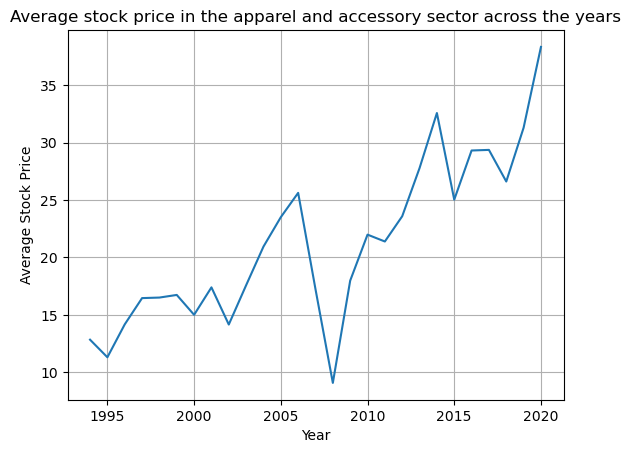

In [18]:
plt.plot(average_stock_price.index, average_stock_price.values)
plt.title('Average stock price in the apparel and accessory sector across the years')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')

#for x, y in zip(average_stock_price.index, average_stock_price.values):
    #label = f'{y:.2f}'  # Format the value with two decimal places
    #plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

### 5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [19]:
### rewrite
firm3 = firm[firm['fyear'] == 2007]
firm4 = firm[firm['fyear'] == 2008]
firm4.head()
firm4['percentage_drop'] = ((firm4['prcc_c'] - firm3['prcc_c'])/firm3['prcc_c']) * 100
firm4.head()
firm4.sort_values('percentage_drop')[:1]

,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,percentage_drop
gvkey,,,,,,,,,,,,
164058,2008,USA,EDDIE BAUER HOLDINGS INC,NaN,5600,0.51,60.425,-165.529,596.92,1023.437,-0.277305,-91.968504


In [20]:
firm3['fyear'].value_counts()

fyear
2007    52
Name: count, dtype: int64

In [21]:
firm3['fyear'].value_counts()

fyear
2007    52
Name: count, dtype: int64

In [22]:
firm4['fyear'].value_counts()

fyear
2008    50
Name: count, dtype: int64

In [23]:
firm4['fyear'].value_counts()

fyear
2008    50
Name: count, dtype: int64

In [24]:
import numpy as np

In [25]:
firm[firm['fyear'] == 2008]['prcc_c'].values

array([  nan,  2.02, 15.1 ,  2.44, 10.74, 13.39, 16.92, 10.04, 13.31,
       29.73,  7.34, 20.57,  0.52,  5.77,  2.97,  3.47,  5.6 , 13.54,
        1.13, 21.82,  5.6 ,  7.85,  1.59,  9.55,  4.18, 14.98,  2.39,
        9.36, 11.72,  9.27, 23.07,  8.25,  2.85, 21.68, 12.2 ,  2.2 ,
        4.32,  6.49, 16.1 ,  0.57,  2.32,  7.45, 14.72, 12.46,  0.51,
        0.25,   nan,   nan,   nan,   nan])

In [26]:
firm_p = firm[(firm['fyear'] == 2007) | (firm['fyear'] == 2008)].copy()


In [27]:
firm_p = firm[(firm['fyear'] == 2007) | (firm['fyear'] == 2008)].copy()

def calculate_p_1_p_2(row):
    p1 = row[row['fyear'] == 2007]['prcc_c'].values
    p2 = row[row['fyear'] == 2008]['prcc_c'].values
    
    if len(p1) > 0 and len(p2) > 0:
        return (p2[0] - p1[0]) / p1[0]
    else:
        return np.nan 


firm_p['p_1_p_2'] = firm_p.groupby('gvkey').apply(calculate_p_1_p_2)
firm_p['p_1_p_2'].min()

-0.9196850393700787

In [28]:
data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}

df = pd.DataFrame(data)

newdf = df.drop("age", axis=1)

print(newdf)

    name  qualified
0  Sally       True
1   Mary      False
2   John      False


### 6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

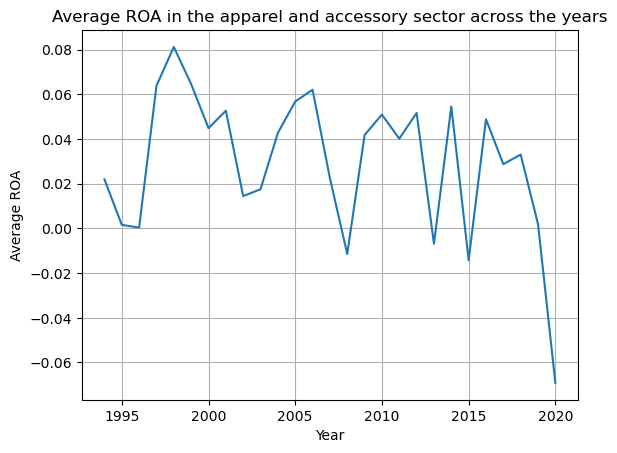

In [29]:
firm5 = firm[firm['location'] == 'USA']

average_roa = firm5.groupby('fyear')['roa'].mean()
average_roa

plt.plot(average_roa.index, average_roa.values)
plt.title('Average ROA in the apparel and accessory sector across the years')
plt.xlabel('Year')
plt.ylabel('Average ROA')
plt.grid(True)
plt.show()


## Part 2: Text analysis on industry sector [NLP]

In [30]:
text = pd.read_csv('data/2020_10K_item1_full.csv', encoding = 'utf-8')

## C. Convert text to lower_case

In [31]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/super_enbicycle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

In [33]:
def clean_text(text):
    # lower case
    clean_text = text.lower()

    # remove punctuation
    clean_text = clean_text.translate(translator)

    # remove stopwords
    clean_words = [i for i in clean_text.split() if i not in sw]
    
    return ' '.join(clean_words)

In [34]:
text['item1'] = text['item_1_text'].apply(clean_text)


## D. Keyword Analysis

In [35]:
new_firm = pd.merge(text, firm, on=['gvkey', 'gvkey'], how='inner')


### word counts method

In [36]:
from collections import Counter

In [37]:
def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

In [38]:
new_firm['item_count'] = new_firm['item1'].apply(get_keywords_wc)


### TF-IDF method

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
def get_keywords_tfidf(document_list):
    '''
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords
    



In [41]:
keywords = get_keywords_tfidf(new_firm['item1'].tolist())


Processing the 0/668 document.
Processing the 100/668 document.
Processing the 200/668 document.
Processing the 300/668 document.
Processing the 400/668 document.
Processing the 500/668 document.
Processing the 600/668 document.


In [42]:
tfidf_matrix = TfidfVectorizer().fit_transform(new_firm['item1'])


In [43]:
vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(new_firm['item1'])

    # Step 3: Get feature names (words)
feature_names = vectorizer.get_feature_names_out()



In [44]:
new_firm['item_count_tfidf'] = keywords

In [45]:
new_firm[['gvkey', 'conm', 'item_count', 'item_count_tfidf']]

,gvkey,conm,item_count,item_count_tfidf
0,63874,STAGE STORES INC,company products retail distribution stores fo...,company military deca commissaries food grocer...
1,63874,STAGE STORES INC,company products retail distribution stores fo...,company military deca commissaries food grocer...
2,63874,STAGE STORES INC,company products retail distribution stores fo...,company military deca commissaries food grocer...
3,63874,STAGE STORES INC,company products retail distribution stores fo...,company military deca commissaries food grocer...
4,63874,STAGE STORES INC,company products retail distribution stores fo...,company military deca commissaries food grocer...
...,...,...,...,...
663,25186,STEIN MART INC,stores merchandise 2020 store sales customers ...,merger stein stores mart synchrony merchandise...
664,25186,STEIN MART INC,stores merchandise 2020 store sales customers ...,merger stein stores mart synchrony merchandise...
665,25186,STEIN MART INC,stores merchandise 2020 store sales customers ...,merger stein stores mart synchrony merchandise...
666,25186,STEIN MART INC,stores merchandise 2020 store sales customers ...,merger stein stores mart synchrony merchandise...


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
text1 = ' '.join(new_firm['item_count'].tolist())

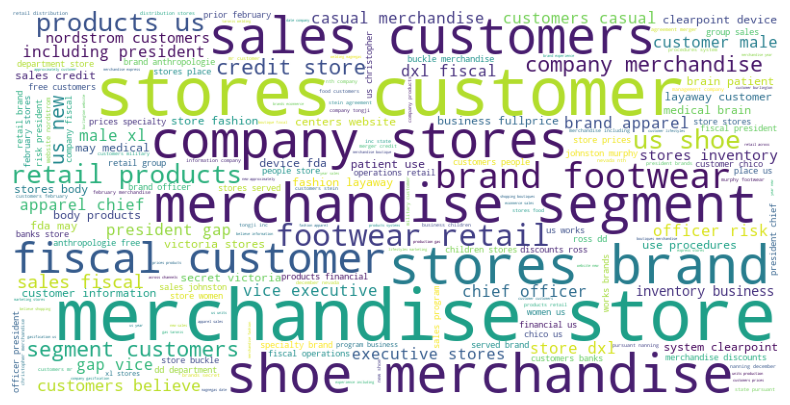

In [48]:
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1) 

plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') 
plt.axis('off')

plt.show()

In [49]:
text2 = ' '.join(new_firm['item_count_tfidf'].tolist())

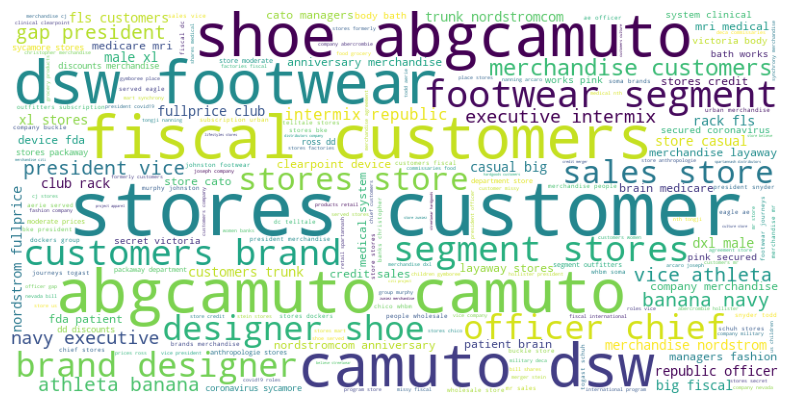

In [50]:
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2) 

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('keyword_tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

### E. Word embedding 

In [51]:
import pandas as pd
from gensim.models import Word2Vec

In [52]:
separation = [i.split() for i in text['item1']]


In [54]:
model = Word2Vec(separation, min_count=1, vector_size=50, workers=3, window=3, sg = 1)

In [ ]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

#### word similarity

In [ ]:
model.wv.most_similar('dsw')[:5]

[('ulta', 0.8989769220352173),
 ('warehouse®', 0.8976123929023743),
 ('jared', 0.8914687633514404),
 ('sephora', 0.8876510262489319),
 ('edelman', 0.8874586224555969)]

In [ ]:
model.wv.most_similar('footwear')[:5]

[('apparel', 0.9495144486427307),
 ('outerwear', 0.8990732431411743),
 ('jewelry', 0.8806851506233215),
 ('handbags', 0.8576302528381348),
 ('clothing', 0.857048511505127)]

In [ ]:
model.wv.most_similar('dxl')[:5]

[('intheatre', 0.8651565313339233),
 ('anthropologie', 0.8615641593933105),
 ('easytoshop', 0.8605946898460388),
 ('dscs', 0.8558057546615601),
 ('vfoperated', 0.8494856953620911)]

## Part3: Comprehensive analysis of GAP company

In [ ]:
gap = firm[firm['conm'].str.contains('GAP')]
gap[['fyear','conm','prcc_c','roa','asset','sale']]

,fyear,conm,prcc_c,roa,asset,sale
gvkey,,,,,,
4990,1994,GAP INC,30.500,0.159781,2004.244,3722.940
4990,1995,GAP INC,42.000,0.151101,2343.068,4395.253
4990,1996,GAP INC,30.125,0.172391,2626.927,5284.381
4990,1997,GAP INC,35.437,0.159970,3337.502,6507.824
4990,1998,GAP INC,56.125,0.208011,3963.919,9054.462
4990,1999,GAP INC,46.000,0.217213,5188.756,11635.398
4990,2000,GAP INC,25.500,0.125126,7012.908,13673.460
4990,2001,GAP INC,13.940,-0.001011,7682.823,13847.873
4990,2002,GAP INC,15.520,0.048218,9902.004,14454.709


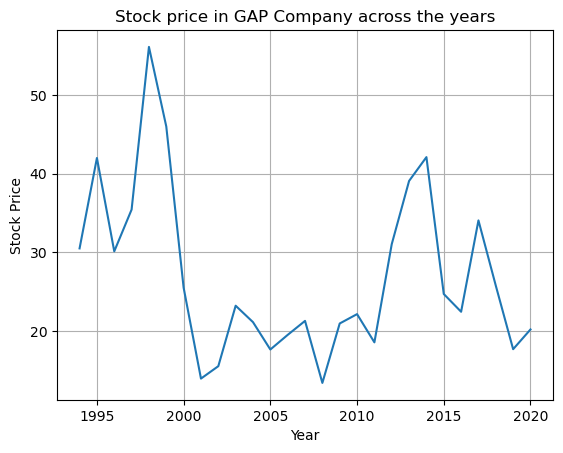

In [ ]:
plt.plot(gap['fyear'],gap['prcc_c'])
plt.title('Stock price in GAP Company across the years')
plt.xlabel('Year')
plt.ylabel('Stock Price')

#for x, y in zip(average_stock_price.index, average_stock_price.values):
    #label = f'{y:.2f}'  # Format the value with two decimal places
    #plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

In [ ]:
import numpy as np

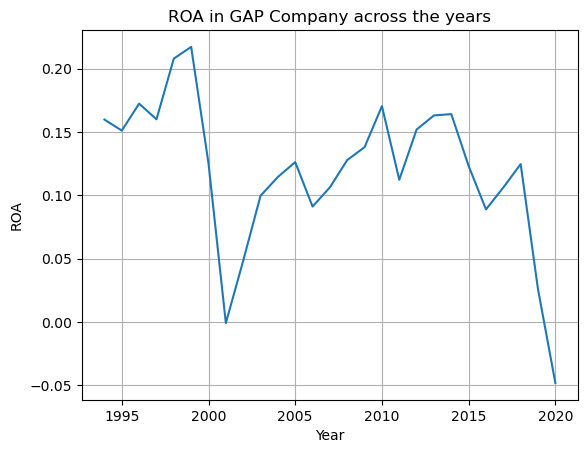

In [ ]:
plt.plot(gap['fyear'],gap['roa'])
plt.title('ROA in GAP Company across the years')
plt.xlabel('Year')
plt.ylabel('ROA')
plt.grid(True)
plt.show()

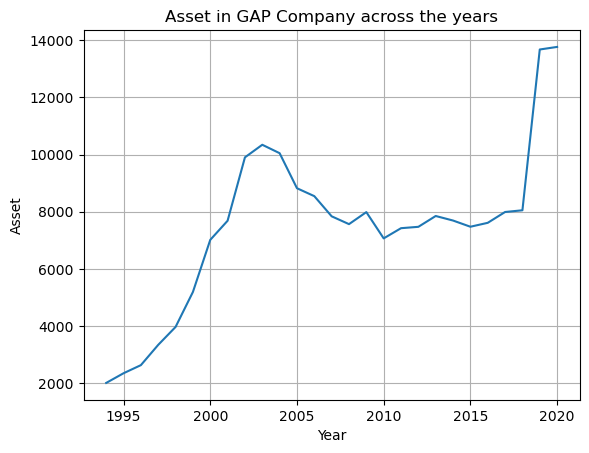

In [ ]:
plt.plot(gap['fyear'],gap['asset'])
plt.title('Asset in GAP Company across the years')
plt.xlabel('Year')
plt.ylabel('Asset')
plt.grid(True)
plt.show()

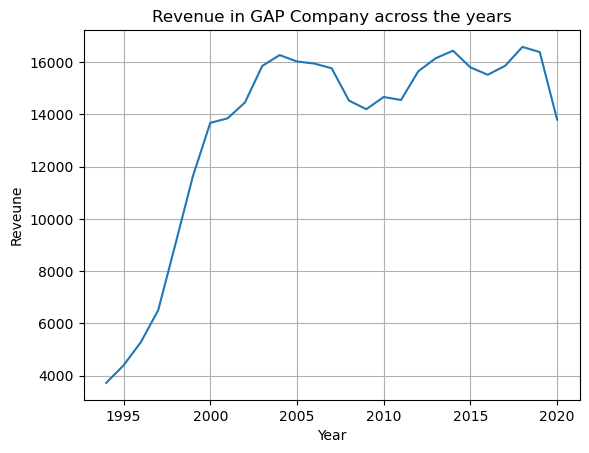

In [ ]:
plt.plot(gap['fyear'],gap['sale'])
plt.title('Revenue in GAP Company across the years')
plt.xlabel('Year')
plt.ylabel('Reveune')
plt.grid(True)